In [ ]:
import pathlib
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc("font", family='Sarasa UI SC')


def count_files(directory):
    counts = defaultdict(int)
    for category_dir in directory.iterdir():
        if category_dir.is_dir():
            counts[category_dir.name] = len(list(category_dir.glob("*")))
    return counts

In [ ]:
data_dir = pathlib.Path(r"C:\Users\xianyu\GraduationProject\UAV_YUNNAN_DATA\last_labels")
train_dir = data_dir / "train"
val_dir = data_dir / "test"

train_counts = count_files(train_dir)
val_counts = count_files(val_dir)
train_counts['01'] = 1000

categories = sorted(set(train_counts.keys()).union(val_counts.keys()))
train_values = [train_counts[cat] for cat in categories]
val_values = [val_counts[cat] for cat in categories]

x = range(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8,3), dpi=300)
ax.bar(x, train_values, width, label='训练集')
ax.bar([i + width for i in x], val_values, width, label='验证集')
ax.set_yscale('log')
ax.set_ylim([1, 20000])
ax.set_ylabel('样本数量', fontsize=12)
ax.set_title('各类别样本计数', fontsize=14)
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(categories)
ax.legend()

fig.tight_layout()
plt.show()
fig.savefig(r"C:\Users\xianyu\GraduationProject\tobacco_plant_count\output\stats\statistics.svg")

In [ ]:
import geopandas as gpd
import numpy as np


gs = gpd.read_file(r"D:\UAV_DATA_NEW\output.shp")
points = []

for i in gs.geometry:
    points.append([i.centroid.x, i.centroid.y])


points = np.array(points)

points[:, 0] = points[:, 0] - points[:, 0].min()
points[:, 1] = points[:, 1] - points[:, 1].min()

points

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# 创建二维点集
# points = np.array([[0, 0], [1.5, 0], [0.4, 0.5], [0.3, 1], [1, 1]])


# 计算三角网
tri = Delaunay(points)

plt.figure(figsize=(15, 15))
# 可视化
plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.plot(points[:, 0], points[:, 1], 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Delaunay Triangulation')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
# 创建二维点集
points = np.array([[0, 0], [0, 2], [0, 4], [2, 1], [2, 3],
                   [4, 0], [4, 2], [4, 4]])



# 绘制连接线
for i in range(len(points)):
    for j in range(i + 1, len(points)):
        ax.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], 'green')

# 绘制点
ax.plot(points[:, 0], points[:, 1], color='red', marker='o', linestyle='none')

# 取消坐标轴
ax.axis('off')
fig.tight_layout()

fig.savefig(r"C:\Users\xianyu\GraduationProject\tobacco_plant_count\output\stats\connection.svg")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 创建二维点集
points = np.array([[0, 0], [0, 2], [0, 4], [2, 1], [2, 3], [4, 0], [4, 2], [4, 4]])

# 绘制连接线
for i in range(len(points)):
    for j in range(i + 1, len(points)):
        plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], 'green')

# 绘制点
plt.plot(points[:, 0], points[:, 1], color='red', marker='o', linestyle='none')

# 设置坐标轴标签和标题
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Point Connections')

# 显示图形
plt.show()


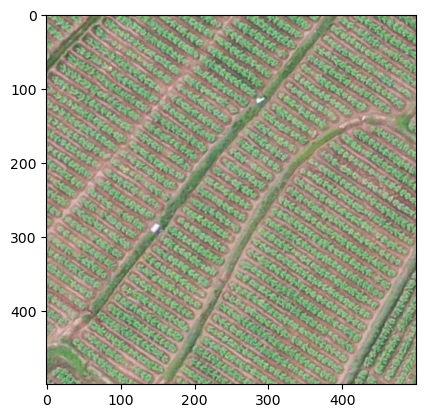

In [41]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cv2

src = rasterio.open(r"D:\UAV_DATA_NEW\output\0_raw_img_UTM47N\061301_UTM47N.tif")
mask = rasterio.open(r"D:\UAV_DATA_NEW\output\2_dilated\061301_dilated.tif")

img = src.read([1, 2, 3]).transpose(1, 2, 0)
img_mask = mask.read(1)
# img[img_mask == 0] = 0
img_cut = img[6200:6700, 7500:8000]

plt.imshow(img_cut)

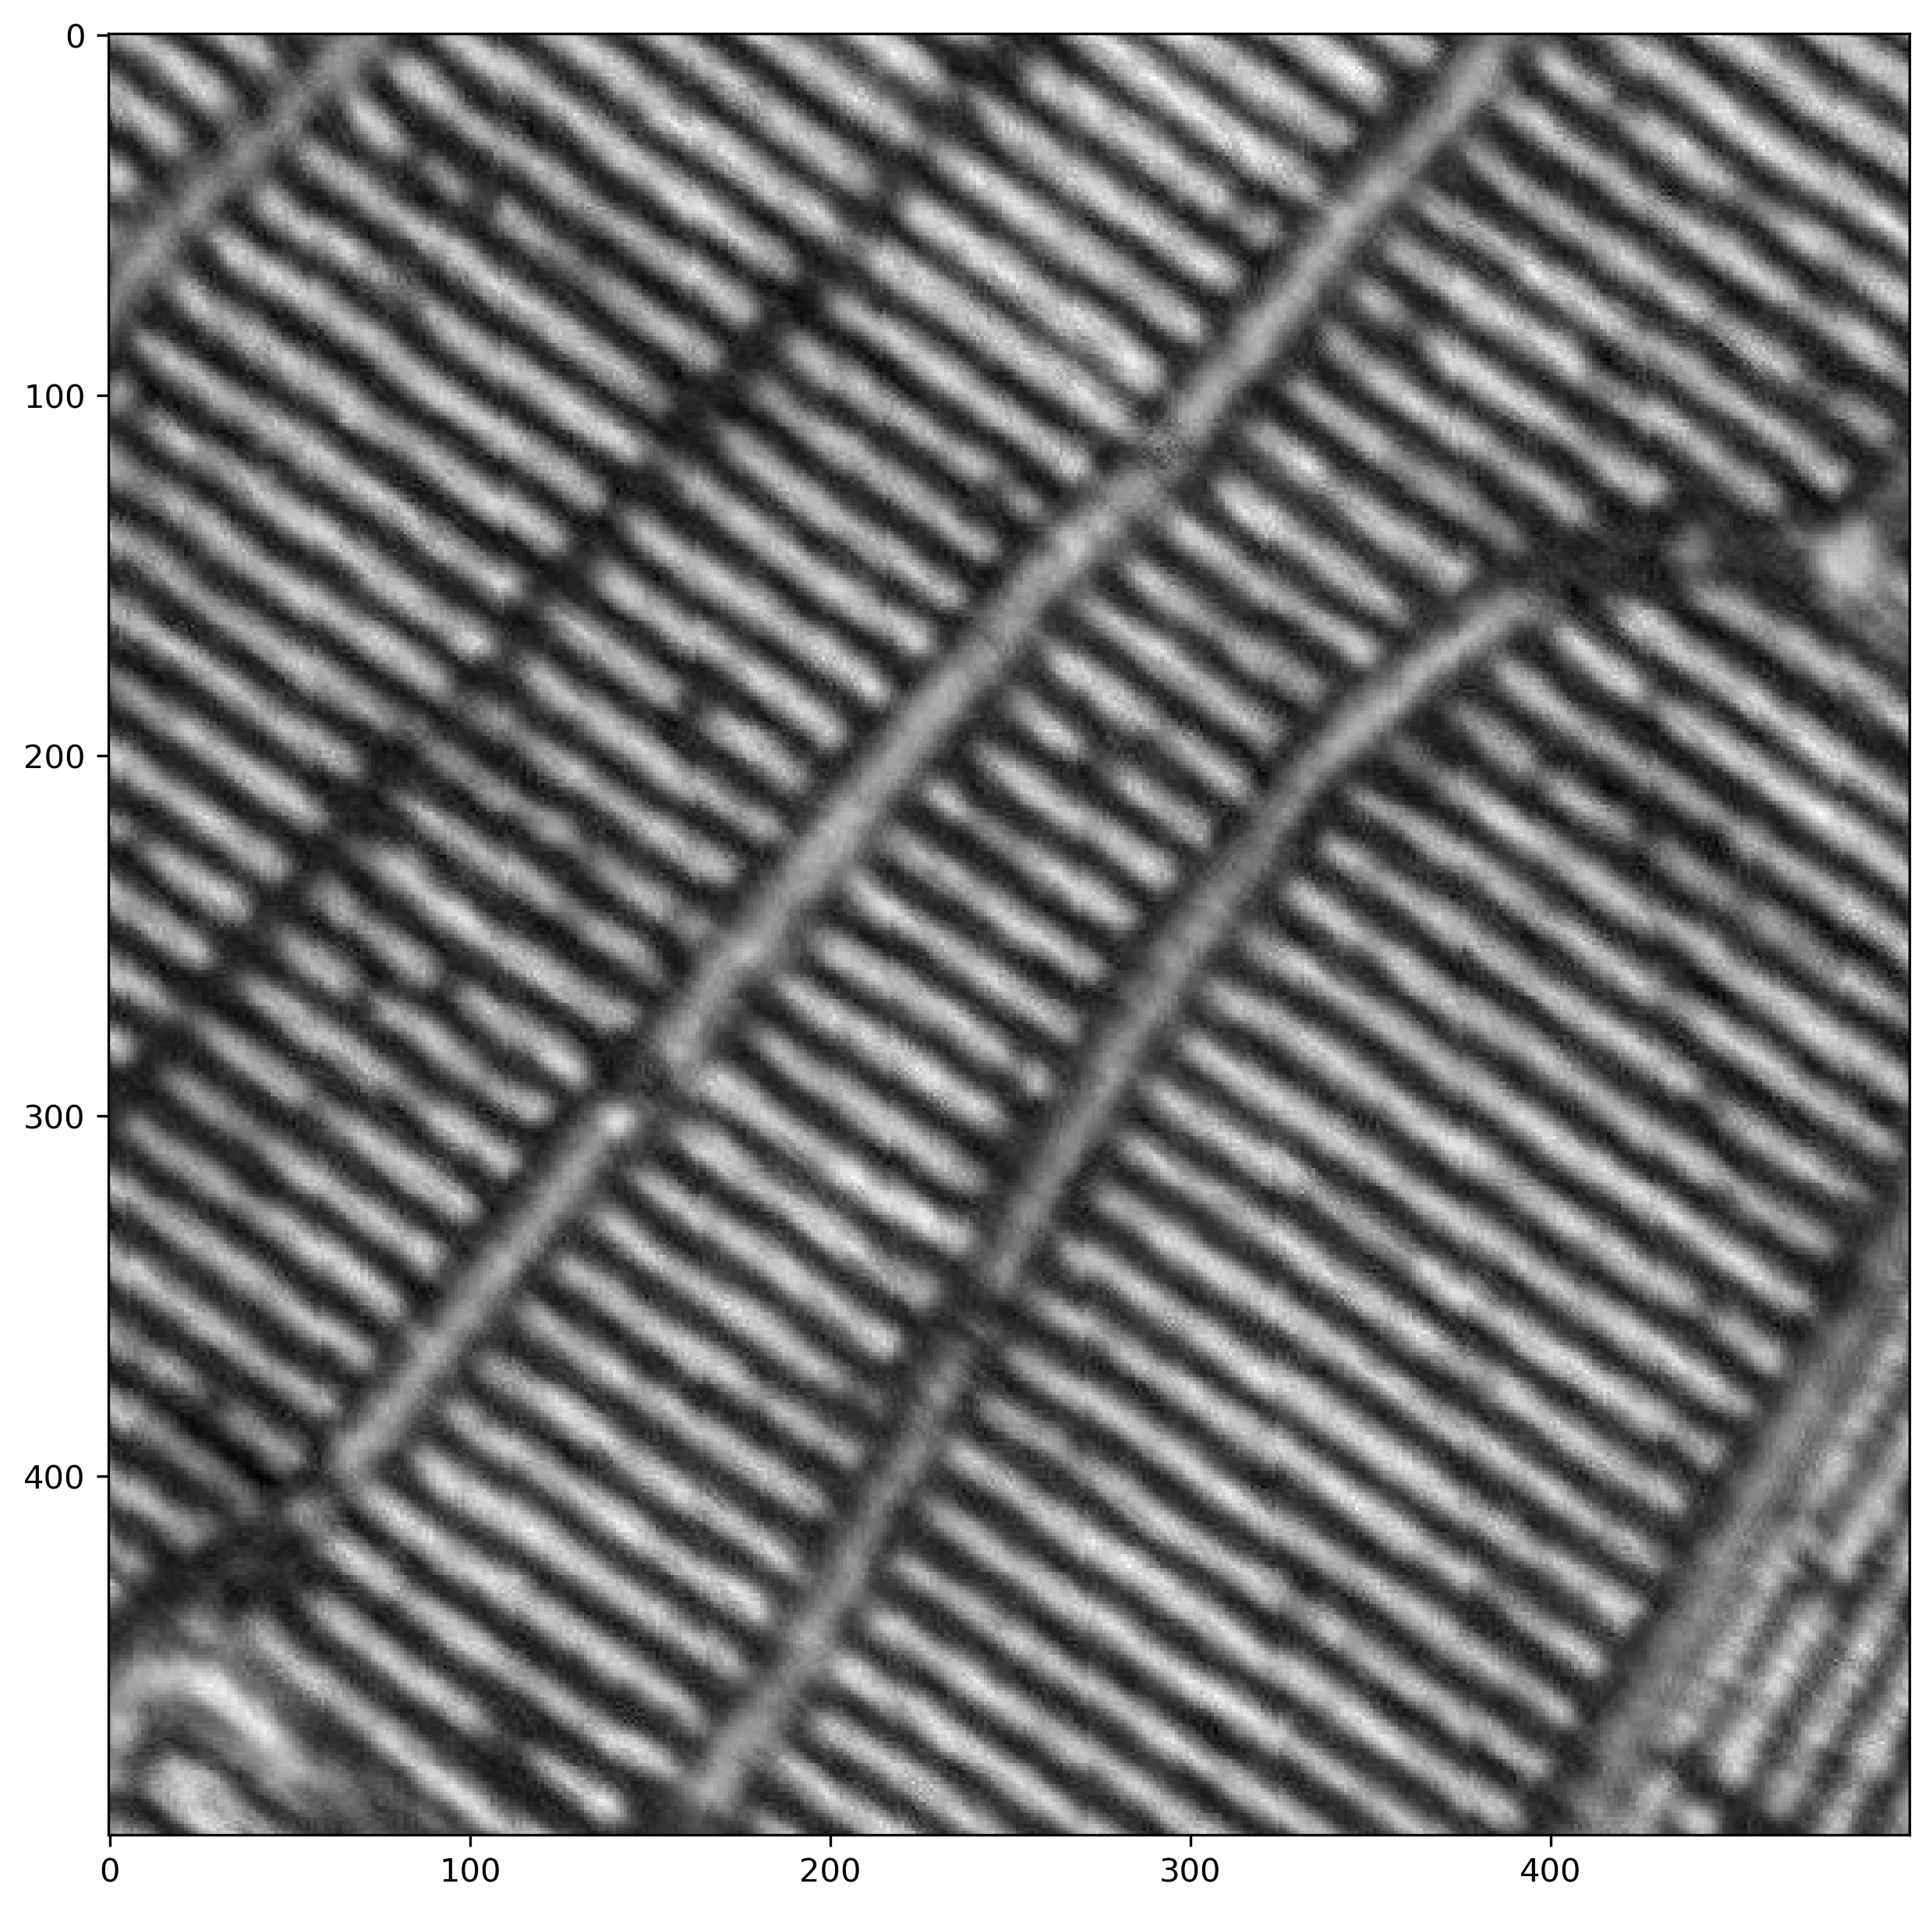

In [45]:
plt.figure(figsize=(10, 10), dpi=300)
r, g, b = img_cut[:, :, 0].astype(float), img_cut[:, :, 1].astype(float), img_cut[:, :, 2].astype(float)
# exg = 3 * g - 1.2 * r - 0.8 * b
exg = 2 * g - r - b
exg = (exg - exg.min()) / (exg.max() - exg.min()) * 255

plt.imshow(exg.astype(np.uint8), cmap='gray')


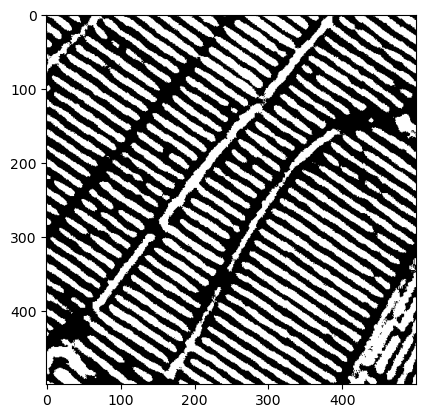

: 

In [47]:
img_bin = cv2.threshold(exg.astype(np.uint8), 0, 255, cv2.THRESH_OTSU)[1]
plt.imshow(img_bin, cmap='gray')

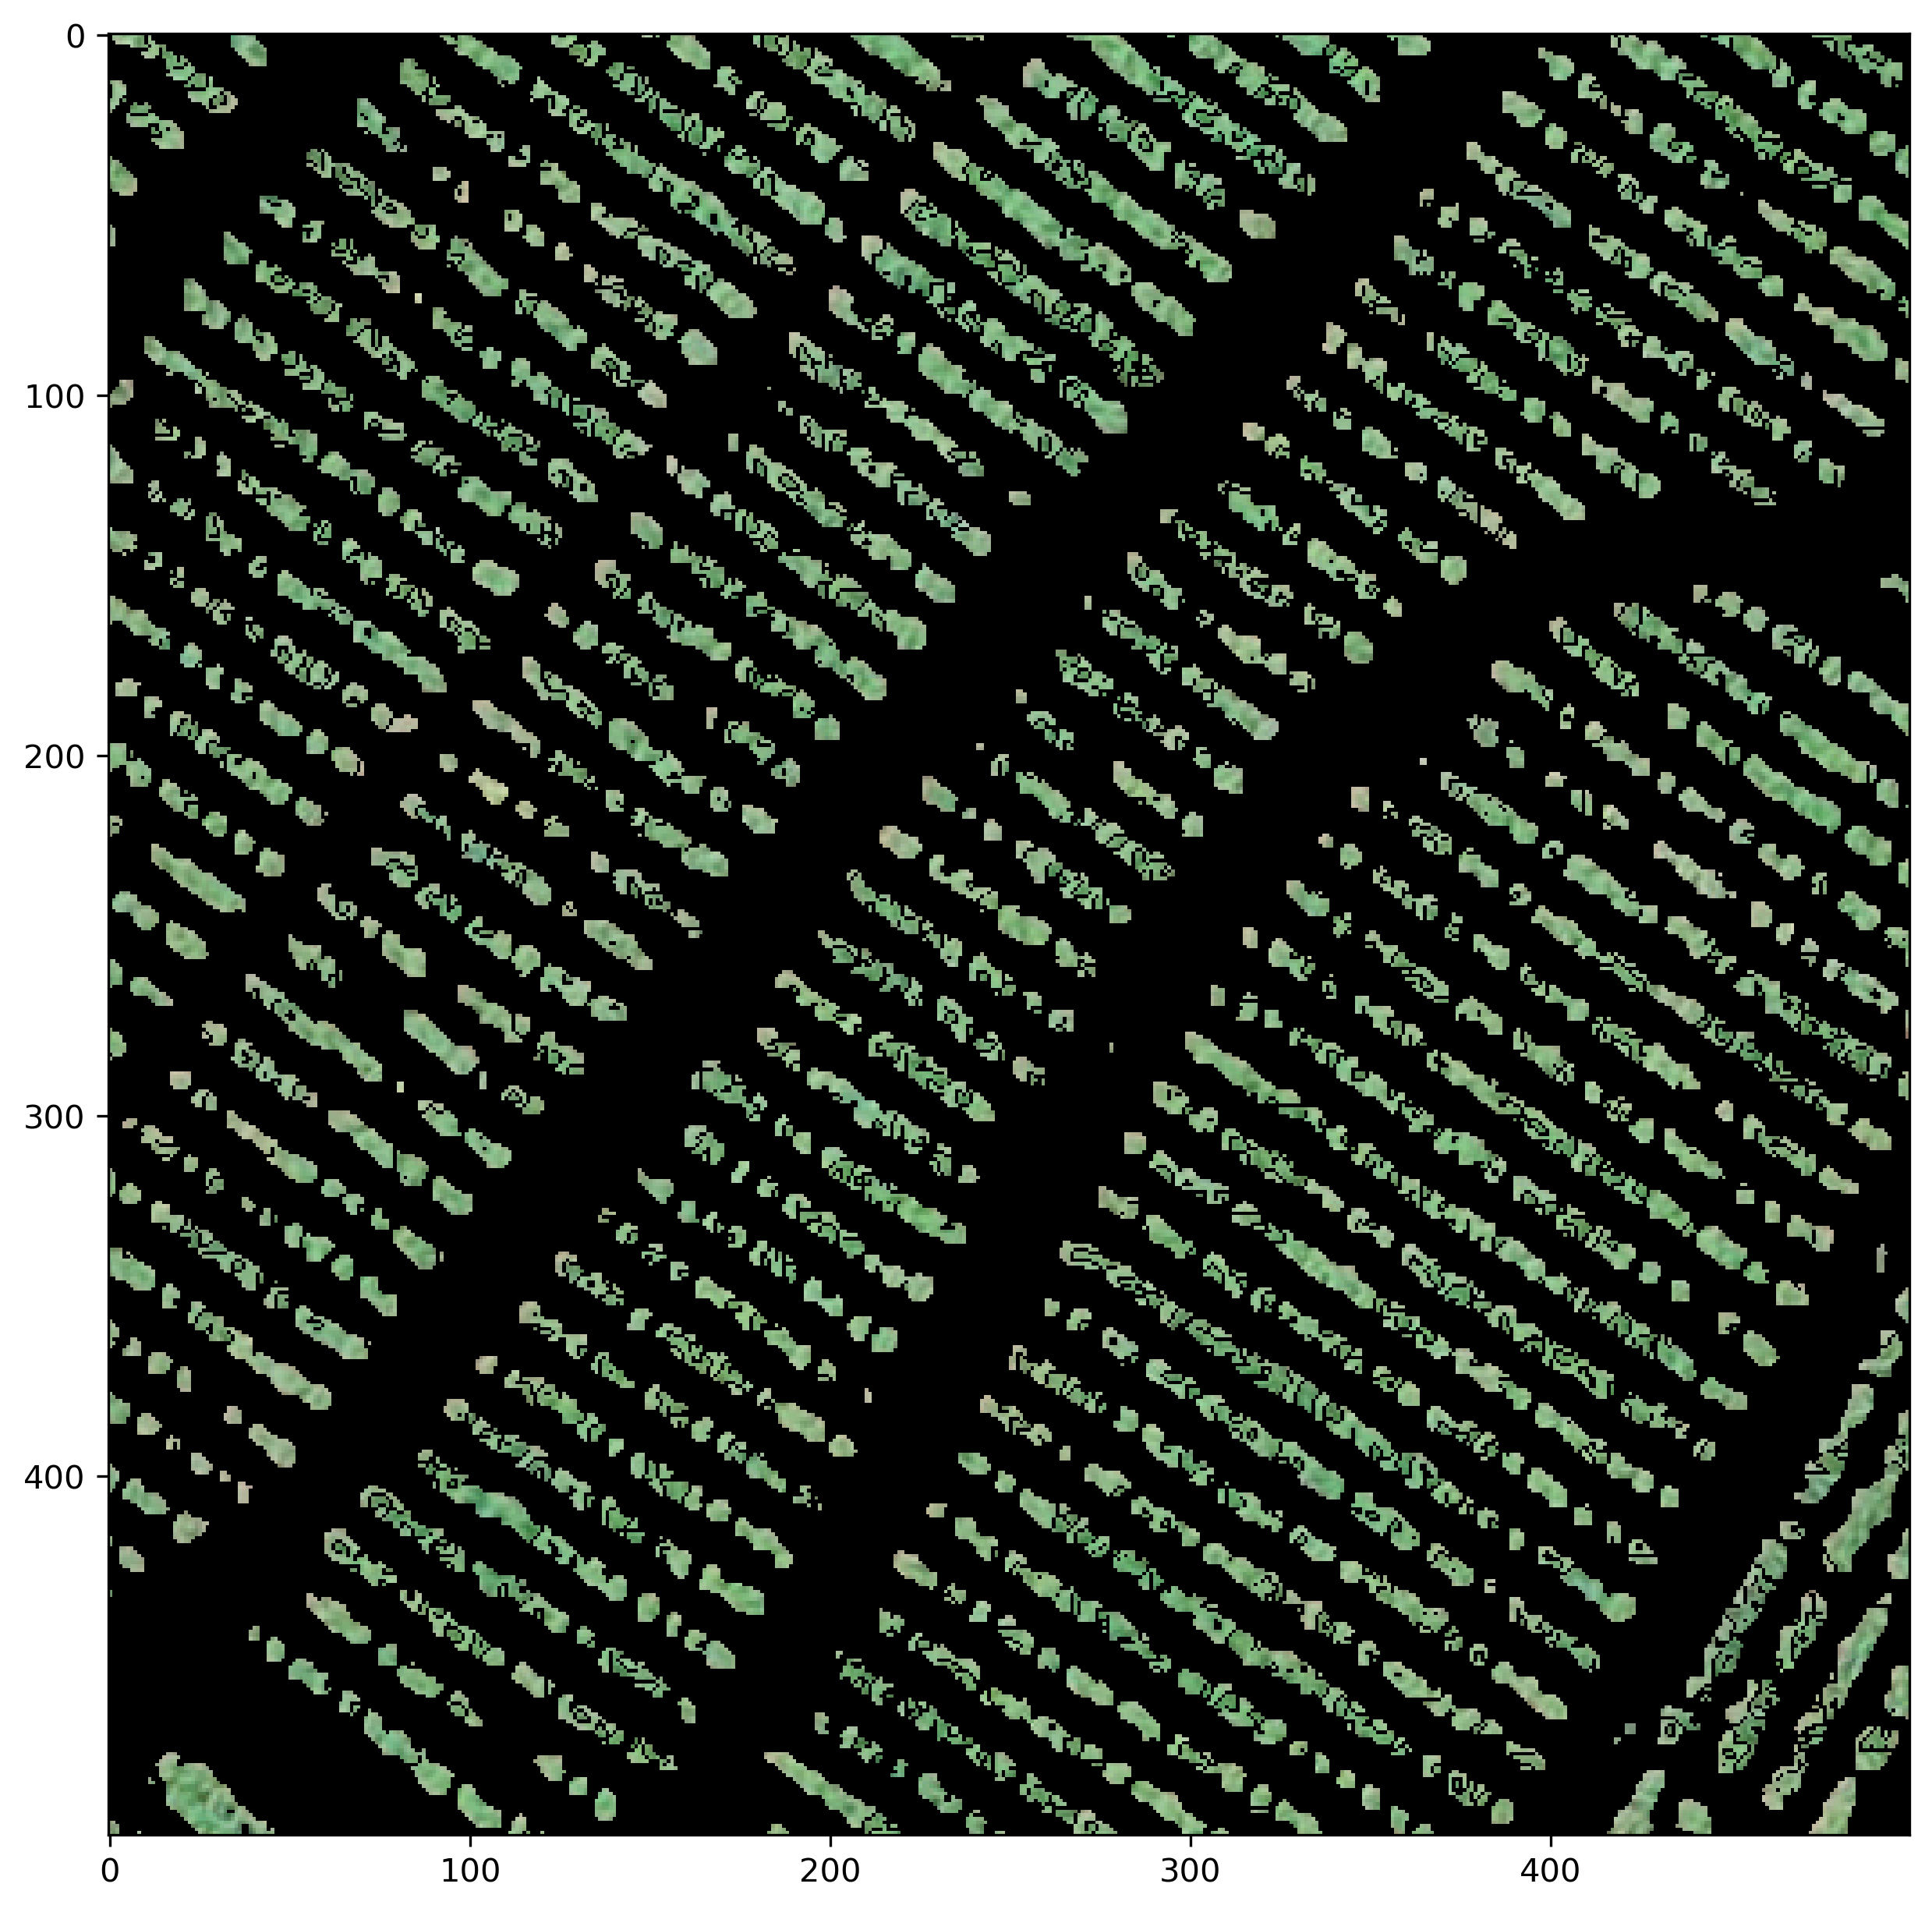

In [30]:
plt.figure(figsize=(10, 10), dpi=300)
slic = cv2.ximgproc.createSuperpixelSLIC(img_cut, algorithm=cv2.ximgproc.SLIC, region_size=20, ruler=30.0)
slic.iterate(10)  #迭代次数，越大效果越好
mask_slic = slic.getLabelContourMask()  #获取Mask，超像素边缘Mask==1
label_slic = slic.getLabels()  #获取超像素标签
number_slic = slic.getNumberOfSuperpixels()  #获取超像素数目
mask_inv_slic = cv2.bitwise_not(mask_slic)
img_slic = cv2.bitwise_and(img_cut, img_cut, mask=mask_inv_slic)  #在原图上绘制超像素边界
plt.imshow(img_slic)

In [9]:
import numpy as np
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = cv2.imread(r"C:\Users\xianyu\Desktop\label\label1_truth.tif", cv2.IMREAD_GRAYSCALE) // 255
y_pred = cv2.imread(r"C:\Users\xianyu\Desktop\label\label1_pred.tif", cv2.IMREAD_GRAYSCALE)
print(np.unique(y_true), np.unique(y_pred))
# 假设 y_true 和 y_pred 是两个 numpy 数组，代表真实标签和预测标签

intersection = np.logical_and(y_true, y_pred)
union = np.logical_or(y_true, y_pred)
iou_score = np.sum(intersection) / np.sum(union)

# 展平数组
y_true_flat = y_true.flatten()
y_pred_flat = y_pred.flatten()

accuracy = accuracy_score(y_true_flat, y_pred_flat)  # PA (Pixel Accuracy)
precision = precision_score(y_true_flat, y_pred_flat)
recall = recall_score(y_true_flat, y_pred_flat)
f1 = f1_score(y_true_flat, y_pred_flat)

print(f"IoU score: {iou_score}")
print(f"Pixel Accuracy: {accuracy}")  # PA (Pixel Accuracy)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


[0 1] [0 1]
IoU score: 0.5992854365156524
Pixel Accuracy: 0.9009575643983083
Precision: 0.6713772259434733
Recall: 0.8480481513327601
F1 score: 0.7494414978495767


In [12]:
y_true = cv2.imread(r"C:\Users\xianyu\Desktop\label\label2_truth.tif", cv2.IMREAD_GRAYSCALE) // 255
y_pred = cv2.imread(r"C:\Users\xianyu\Desktop\label\label2_pred.tif", cv2.IMREAD_GRAYSCALE)
print(np.unique(y_true), np.unique(y_pred))
# 假设 y_true 和 y_pred 是两个 numpy 数组，代表真实标签和预测标签

intersection = np.logical_and(y_true, y_pred)
union = np.logical_or(y_true, y_pred)
iou_score = np.sum(intersection) / np.sum(union)

# 展平数组
y_true_flat = y_true.flatten()
y_pred_flat = y_pred.flatten()

accuracy = accuracy_score(y_true_flat, y_pred_flat)  # PA (Pixel Accuracy)
precision = precision_score(y_true_flat, y_pred_flat)
recall = recall_score(y_true_flat, y_pred_flat)
f1 = f1_score(y_true_flat, y_pred_flat)

print(f"IoU score: {iou_score}")
print(f"Pixel Accuracy: {accuracy}")  # PA (Pixel Accuracy)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


[0 1] [0 1]
IoU score: 0.6329644851933818
Pixel Accuracy: 0.8866748229904207
Precision: 0.6979408757088408
Recall: 0.8717777519739898
F1 score: 0.7752336207341629


In [19]:
def f(a, b):
    return 2 / (1 / a + 1 / b)


print(f(0.675	,0.842))
print(f(0.657	,0.841))

0.7493078444297957
0.7376995994659545
